# Data Science 101
## Project 2: FIFA dataset

The main goal of the analysis is to learn how to load a data set, make some data prep, simple descriptive analysis and set a model to find out what are the best opportunities in termos of value-for-money in FIFA 2018

Since we like the idea of mini-tasks let's quickly set them here:

> 1. Load FIFA dataset
> 2. Keep num variables: player’s worth, “0-100” attributes, name, position and club
>> 2.1. Other data prep that may arise
> 3. Drop GKs
> 4. Descriptive: univariate analysis
> 5. Descriptive: correlations Pearson’s and Spearman’s
> 6. PCA with players’ attributes: train PCA
> 7. PCA with players’ attributes: scree plot
> 8. PCA with players’ attributes: plot top 2 components. 
>> 8.1. Try to incorporate players’ worth in the chart colour scheme
> 9. PCA with players’ attributes: calculate top 5 components for each player
> 10. PCA with players’ attributes: radial chart to compare main components for top 3 most valued players against themselves and the average
> 11. LGBM: split train-test dataset
> 12. LGBM: train model to predict worth
> 13. LGBM: plot predict vs actual worth
> 14. Decisioning radial plot of PCAs for top 3 gaps in prediction-actual worth
> 15. Decisioning radial plot of PCAs for top gaps in prediction-actual worth where overall score is between ranges: 70-75, 80-85, 85-90, 90+

This should include every step I thought at first, but it is obvious that some of the mini-tasks I wrote may not be such "mini". This would imply in some extra tasks that will be better defined in the due course. 

### Loading Libraries

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import sklearn as skt

In [3]:
pwd

'/home/guilherme/Python playing around/FIFA data'

In [21]:
ls

 data.csv  'Playing with FIFA Dataset.ipynb'


We are starting good!! lol

### **Task 1** Loading FIFA data

In [2]:
data = pd.read_csv('/home/guilherme/Python playing around/FIFA data/data.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [8]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Data is in the house!

### **Task 2** Keeping players attributes, positions, clubs, names, IDs and Values

In [4]:
data = data[['ID','Name','Overall','Club','Value','Position','Crossing','Finishing','HeadingAccuracy',
             'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
            'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','SlidingTackle',
            'StandingTackle']]
data.head()

,ID,Name,Overall,Club,Value,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,SlidingTackle,StandingTackle
0,158023,L. Messi,94,FC Barcelona,€110.5M,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,26.0,28.0
1,20801,Cristiano Ronaldo,94,Juventus,€77M,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,23.0,31.0
2,190871,Neymar Jr,92,Paris Saint-Germain,€118.5M,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,33.0,24.0
3,193080,De Gea,91,Manchester United,€72M,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,13.0,21.0
4,192985,K. De Bruyne,91,Manchester City,€102M,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,51.0,58.0


### **Task 2.1** Additional dataprep

In [5]:
data['ValueNum'] = data['Value'].str.slice(start=1).str.replace(r'M', '').convert_objects(convert_numeric=True)

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [33]:
data['ValueNum']

0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
5         93.0
6         67.0
7         80.0
8         51.0
9         68.0
10        77.0
11        76.5
12        44.0
13        60.0
14        63.0
15        89.0
16        83.5
17        78.0
18        58.0
19        53.5
20        51.5
21        60.0
22        38.0
23        64.5
24        27.0
25        81.0
26        69.5
27        59.5
28        69.5
29        62.0
         ...  
18177      NaN
18178      NaN
18179      NaN
18180      NaN
18181      NaN
18182      NaN
18183      0.0
18184      NaN
18185      NaN
18186      NaN
18187      NaN
18188      NaN
18189      NaN
18190      NaN
18191      NaN
18192      NaN
18193      NaN
18194      NaN
18195      NaN
18196      NaN
18197      NaN
18198      NaN
18199      NaN
18200      NaN
18201      NaN
18202      NaN
18203      NaN
18204      NaN
18205      NaN
18206      NaN
Name: ValueNum, Length: 18207, dtype: float64

In [6]:
data_clear = data.dropna()

### **Task 3** Excluding GK

In [7]:
data_clear = data_clear[data_clear['Position']!='GK']

Data is clean and waiting for the analysis! \o/

### **Task 4** Descriptive analysis

In [40]:
data_clear.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6368.0,208167.549309,25939.658404,41.0,193473.00,211383.0,227600.5,246239.0
Overall,6368.0,72.709642,4.290315,53.0,70.00,72.0,75.0,94.0
Crossing,6368.0,60.611024,13.635518,11.0,53.00,64.0,70.0,93.0
Finishing,6368.0,56.552921,16.222112,10.0,45.00,61.0,69.0,95.0
HeadingAccuracy,6368.0,61.480842,12.124736,15.0,54.00,63.0,71.0,94.0
ShortPassing,6368.0,69.302921,7.092477,38.0,65.00,70.0,74.0,93.0
Volleys,6368.0,53.542871,15.291730,11.0,42.00,56.0,65.0,90.0
Dribbling,6368.0,67.543656,11.023141,16.0,64.00,70.0,74.0,97.0
Curve,6368.0,58.784234,14.949785,12.0,49.00,62.0,70.0,94.0
FKAccuracy,6368.0,52.988536,15.727328,10.0,40.00,54.0,66.0,94.0


In [9]:
aggregate = {
    'ValueNum':'mean','Overall':'mean','ID':'count'
}

data_clear.groupby('Position').agg(aggregate)

,ValueNum,Overall,ID
Position,,,
CAM,5.982340,72.501104,453
CB,4.818410,72.774059,478
CDM,5.200000,72.938650,326
CF,7.436667,73.566667,30
CM,5.705048,72.233173,416
LAM,6.966667,72.444444,18
LB,4.640541,72.594595,407
LCB,5.588750,73.321875,320
LCM,7.247273,73.431818,220


In [11]:
sum_data = data_clear.groupby('Position').agg(aggregate)

In [8]:
import matplotlib.pyplot as plt

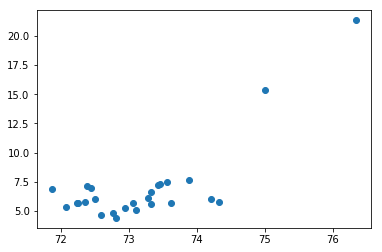

In [13]:
plt.scatter(sum_data['Overall'],sum_data['ValueNum'])
plt.show()

In [14]:
np.corrcoef(sum_data['Overall'],sum_data['ValueNum'])

array([[1.        , 0.77116786],
       [0.77116786, 1.        ]])

As one can notice, although the average value has a positive correlation with the overall value (Pearson's $\rho$ of 0.77), it is not a strong correlation or linear for most positions.

### **Task 5** Correlation matrix between attributes

In [15]:
data_clear[['Overall','ValueNum','Crossing','Finishing','HeadingAccuracy',
             'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
            'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','SlidingTackle',
            'StandingTackle']].corr()

,Overall,ValueNum,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,SlidingTackle,StandingTackle
Overall,1.000000,0.808410,0.297602,0.201370,0.293640,0.598484,0.289838,0.325832,0.312887,0.276412,0.418896,0.537009,0.039118,0.043579,0.086821,0.792962,0.054704,0.357829,0.138003,0.264725,0.177253,0.285363,0.306205,0.248077,0.252554,0.353806,0.261650,0.692669,0.237891,0.191478,0.215894
ValueNum,0.808410,1.000000,0.245620,0.246769,0.157695,0.494490,0.279530,0.345810,0.272969,0.232569,0.311132,0.497115,0.148010,0.142983,0.159596,0.616471,0.115444,0.286962,0.068219,0.215633,0.063614,0.263208,0.122090,0.084659,0.268486,0.330907,0.227790,0.530695,0.090589,0.043980,0.064143
Crossing,0.297602,0.245620,1.000000,0.378460,-0.370955,0.569400,0.422773,0.685442,0.710684,0.579973,0.491461,0.646089,0.455246,0.377103,0.556083,0.291834,0.514221,0.386088,-0.130598,0.259138,-0.404589,0.526228,-0.115462,-0.015709,0.553026,0.631700,0.342653,0.311454,-0.056816,-0.030515,-0.037493
Finishing,0.201370,0.246769,0.378460,1.000000,-0.164697,0.285058,0.809237,0.689553,0.573782,0.505066,0.030562,0.617450,0.383831,0.328832,0.479356,0.214328,0.349033,0.653217,-0.121369,0.027648,-0.256122,0.767918,-0.364491,-0.616891,0.831839,0.611135,0.714931,0.283187,-0.623120,-0.672530,-0.652704
HeadingAccuracy,0.293640,0.157695,-0.370955,-0.164697,1.000000,-0.149229,-0.097233,-0.386001,-0.327632,-0.292900,-0.172619,-0.239685,-0.436734,-0.308564,-0.528783,0.239739,-0.563023,-0.005457,0.380062,-0.004772,0.662683,-0.220346,0.418266,0.232033,-0.202546,-0.338075,-0.045008,0.151679,0.244024,0.219918,0.228871
ShortPassing,0.598484,0.494490,0.569400,0.285058,-0.149229,1.000000,0.349946,0.546034,0.535127,0.515901,0.761401,0.716696,0.098366,0.013148,0.291817,0.524923,0.318894,0.371193,-0.113636,0.282762,-0.179191,0.480695,0.111025,0.242011,0.401737,0.693130,0.299701,0.538429,0.190782,0.179717,0.210069
Volleys,0.289838,0.279530,0.422773,0.809237,-0.097233,0.349946,1.000000,0.642111,0.636514,0.569085,0.119444,0.620007,0.307012,0.247165,0.434526,0.311059,0.331173,0.685808,-0.085965,0.040090,-0.204922,0.751823,-0.241742,-0.477492,0.747957,0.602680,0.714144,0.383491,-0.492571,-0.540282,-0.519753
Dribbling,0.325832,0.345810,0.685442,0.689553,-0.386001,0.546034,0.642111,1.000000,0.703645,0.543840,0.316619,0.845784,0.594599,0.505814,0.696533,0.308725,0.580306,0.540198,-0.145338,0.186219,-0.448208,0.692943,-0.292327,-0.354015,0.778282,0.739572,0.522724,0.361983,-0.371316,-0.385910,-0.379292
Curve,0.312887,0.272969,0.710684,0.573782,-0.327632,0.535127,0.636514,0.703645,1.000000,0.760636,0.406860,0.693583,0.370008,0.274145,0.540152,0.308523,0.480613,0.575999,-0.157832,0.153658,-0.370660,0.703677,-0.168465,-0.200896,0.648497,0.699630,0.567061,0.397369,-0.239152,-0.249293,-0.236824
FKAccuracy,0.276412,0.232569,0.579973,0.505066,-0.292900,0.515901,0.569085,0.543840,0.760636,1.000000,0.451202,0.573010,0.200268,0.102289,0.396552,0.264426,0.381155,0.551392,-0.175584,0.100844,-0.303144,0.678726,-0.119548,-0.131302,0.514952,0.647859,0.583835,0.358595,-0.177959,-0.191327,-0.169350


This is what we wanted, but is not very beautiful though... let's see if we can make it better!

In [16]:
corr = data_clear[['Overall','ValueNum','Crossing','Finishing','HeadingAccuracy',
             'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
            'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','SlidingTackle',
            'StandingTackle']].corr()

In [17]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,Overall,ValueNum,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,SlidingTackle,StandingTackle
Overall,1,0.80841,0.297602,0.20137,0.29364,0.598484,0.289838,0.325832,0.312887,0.276412,0.418896,0.537009,0.0391175,0.0435787,0.0868206,0.792962,0.0547041,0.357829,0.138003,0.264725,0.177253,0.285363,0.306205,0.248077,0.252554,0.353806,0.26165,0.692669,0.237891,0.191478,0.215894
ValueNum,0.80841,1,0.24562,0.246769,0.157695,0.49449,0.27953,0.34581,0.272969,0.232569,0.311132,0.497115,0.14801,0.142983,0.159596,0.616471,0.115444,0.286962,0.0682193,0.215633,0.0636139,0.263208,0.12209,0.084659,0.268486,0.330907,0.22779,0.530695,0.0905893,0.0439801,0.0641434
Crossing,0.297602,0.24562,1,0.37846,-0.370955,0.5694,0.422773,0.685442,0.710684,0.579973,0.491461,0.646089,0.455246,0.377103,0.556083,0.291834,0.514221,0.386088,-0.130598,0.259138,-0.404589,0.526228,-0.115462,-0.0157094,0.553026,0.6317,0.342653,0.311454,-0.0568157,-0.0305153,-0.0374932
Finishing,0.20137,0.246769,0.37846,1,-0.164697,0.285058,0.809237,0.689553,0.573782,0.505066,0.0305623,0.61745,0.383831,0.328832,0.479356,0.214328,0.349033,0.653217,-0.121369,0.0276481,-0.256122,0.767918,-0.364491,-0.616891,0.831839,0.611135,0.714931,0.283187,-0.62312,-0.67253,-0.652704
HeadingAccuracy,0.29364,0.157695,-0.370955,-0.164697,1,-0.149229,-0.0972333,-0.386001,-0.327632,-0.2929,-0.172619,-0.239685,-0.436734,-0.308564,-0.528783,0.239739,-0.563023,-0.00545722,0.380062,-0.00477192,0.662683,-0.220346,0.418266,0.232033,-0.202546,-0.338075,-0.045008,0.151679,0.244024,0.219918,0.228871
ShortPassing,0.598484,0.49449,0.5694,0.285058,-0.149229,1,0.349946,0.546034,0.535127,0.515901,0.761401,0.716696,0.0983659,0.0131479,0.291817,0.524923,0.318894,0.371193,-0.113636,0.282762,-0.179191,0.480695,0.111025,0.242011,0.401737,0.69313,0.299701,0.538429,0.190782,0.179717,0.210069
Volleys,0.289838,0.27953,0.422773,0.809237,-0.0972333,0.349946,1,0.642111,0.636514,0.569085,0.119444,0.620007,0.307012,0.247165,0.434526,0.311059,0.331173,0.685808,-0.0859646,0.0400903,-0.204922,0.751823,-0.241742,-0.477492,0.747957,0.60268,0.714144,0.383491,-0.492571,-0.540282,-0.519753
Dribbling,0.325832,0.34581,0.685442,0.689553,-0.386001,0.546034,0.642111,1,0.703645,0.54384,0.316619,0.845784,0.594599,0.505814,0.696533,0.308725,0.580306,0.540198,-0.145338,0.186219,-0.448208,0.692943,-0.292327,-0.354015,0.778282,0.739572,0.522724,0.361983,-0.371316,-0.38591,-0.379292
Curve,0.312887,0.272969,0.710684,0.573782,-0.327632,0.535127,0.636514,0.703645,1,0.760636,0.40686,0.693583,0.370008,0.274145,0.540152,0.308523,0.480613,0.575999,-0.157832,0.153658,-0.37066,0.703677,-0.168465,-0.200896,0.648497,0.69963,0.567061,0.397369,-0.239152,-0.249293,-0.236824
FKAccuracy,0.276412,0.232569,0.579973,0.505066,-0.2929,0.515901,0.569085,0.54384,0.760636,1,0.451202,0.57301,0.200268,0.102289,0.396552,0.264426,0.381155,0.551392,-0.175584,0.100844,-0.303144,0.678726,-0.119548,-0.131302,0.514952,0.647859,0.583835,0.358595,-0.177959,-0.191327,-0.16935


That's a bit better!!

### **Task 6** Training PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA()

In [10]:
pca.fit(data_clear[['Overall','Crossing','Finishing','HeadingAccuracy',
             'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
            'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','SlidingTackle',
            'StandingTackle']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca_applied = pca.transform(data_clear[['Overall','Crossing','Finishing','HeadingAccuracy',
             'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
            'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','SlidingTackle',
            'StandingTackle']])

In [13]:
components = pca.components_

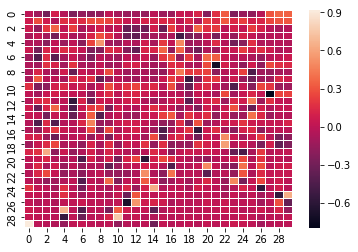

In [14]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(components, linewidth=0.01)
plt.show()

### **Task 7** Scree plot

Text(0,0.5,'Cumulative explained variance')

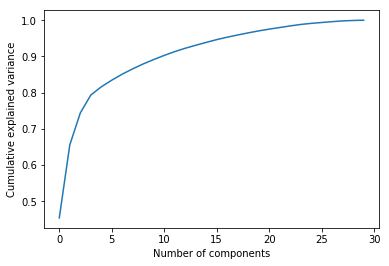

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The scree plot above show that the firs 5 components are responsible for 85% of the explained variance of the data. So visualizing these components only would give most of the information contained in the players' attributes.

### **Task 8** Plotting first 2 components

In [25]:
pca.transform

<bound method _BasePCA.transform of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [41]:
pca_applied.shape

(6368, 30)

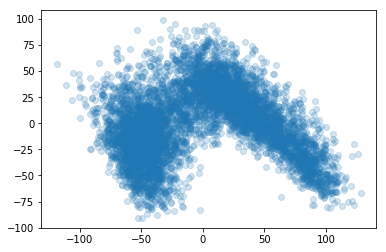

In [26]:
plt.scatter(pca_applied[:, 0], pca_applied[:, 1], alpha=0.2)

### **Task 8.1** Try to incorporate players’ worth in the chart colour scheme

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


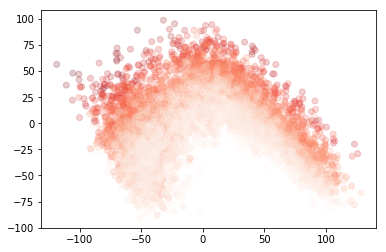

In [27]:
plt.scatter(pca_applied[:, 0], pca_applied[:, 1], alpha=0.2, c=np.log(data_clear['ValueNum']).values.T, cmap='Reds')

### Task 9 Calculate top 5 components for each player

In [30]:
pca_applied[:,0:5].shape

(6368, 5)

This one was already calculated and we can simply pick the fist 5 components (PCA always output the components ordered by variance explained)

### Task 10 Radial chart to compare main components for top 3 most valued players against themselves and the average

In [33]:
avg_comp = np.average(pca_applied[:,0:5],axis=0)

In [34]:
avg_comp

array([-6.62786409e-16, -7.84408830e-15,  7.77992969e-15,  1.04126646e-14,
       -1.06977520e-15])

In [56]:
comp_data = np.concatenate((data_clear[['Name']],pca_applied[:,0:5] , data_clear[['ValueNum']]),axis=1)

In [58]:
df_comp_data = pd.DataFrame(comp_data,columns=['Name','comp1','comp2','comp3','comp4','comp5','ValueNum'])

In [59]:
df_comp_data.head()

,Name,comp1,comp2,comp3,comp4,comp5,ValueNum
0,L. Messi,-118.56,56.406,10.7353,-7.93196,-1.95709,110.5
1,Cristiano Ronaldo,-100.365,41.7176,40.9277,-47.193,0.0744167,77
2,Neymar Jr,-105.502,48.0204,0.104217,-10.1534,-3.61542,118.5
3,K. De Bruyne,-53.0912,89.148,23.3032,-5.10228,-12.507,102
4,E. Hazard,-100.602,47.0424,1.08137,-10.7256,-10.6732,93


In [61]:
ordered_players = df_comp_data.sort_values(by='ValueNum',ascending=False)

In [66]:
ordered_players[0:3]

,Name,comp1,comp2,comp3,comp4,comp5,ValueNum
2,Neymar Jr,-105.502,48.0204,0.104217,-10.1534,-3.61542,118.5
0,L. Messi,-118.56,56.406,10.7353,-7.93196,-1.95709,110.5
3,K. De Bruyne,-53.0912,89.148,23.3032,-5.10228,-12.507,102


In [73]:
df_comp_data['comp2'].mean()

-7.84408830463804e-15

In [77]:
radar_data = ordered_players[0:5].append({'Name':'Average', 
                                          'comp1':df_comp_data['comp1'].mean(),
                                         'comp2':df_comp_data['comp2'].mean(),
                                         'comp3':df_comp_data['comp3'].mean(),
                                         'comp4':df_comp_data['comp4'].mean(),
                                         'comp5':df_comp_data['comp5'].mean(),
                                         'ValueNum':df_comp_data['ValueNum'].mean()}, ignore_index=True)

In [78]:
radar_data

,Name,comp1,comp2,comp3,comp4,comp5,ValueNum
0,Neymar Jr,-105.502,48.0204,0.104217,-10.1534,-3.61542,118.5
1,L. Messi,-118.56,56.406,10.7353,-7.93196,-1.95709,110.5
2,K. De Bruyne,-53.0912,89.148,23.3032,-5.10228,-12.507,102
3,E. Hazard,-100.602,47.0424,1.08137,-10.7256,-10.6732,93
4,P. Dybala,-110.782,36.5021,14.3116,-10.8624,7.76617,89
5,Average,-6.62786e-16,-7.84409e-15,7.77993e-15,1.04127e-14,-1.06978e-15,5.71054


Radar chart will not be a good visualization since we average is close to zero and the components values can be positive or negative...

### Task 10.1 Visualize top 2 components for top 100 most valuable players and make bubble proportional to value (or log_value). Put the label of top 5 MVP  

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


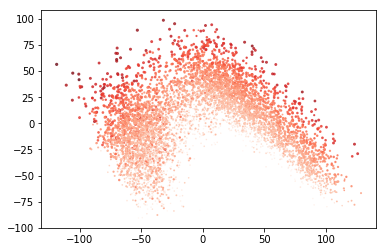

In [23]:
plt.scatter(pca_applied[:, 0], 
            pca_applied[:, 1], 
            alpha=0.7, 
            s=np.log(data_clear['ValueNum']).values.T, 
            c=np.log(data_clear['Overall']).values.T,
            cmap='Reds')

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/guilherme/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


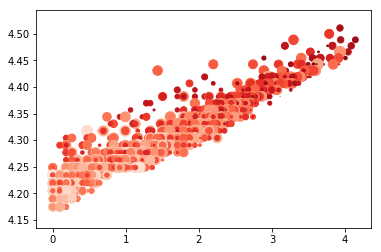

In [21]:
plt.scatter(np.log(data_clear['ValueNum']).values.T, 
            np.log(data_clear['Overall']).values.T, 
            alpha=1, 
            s=pca_applied[:, 0], 
            c=pca_applied[:, 1],
            cmap='Reds')

## LGBM model

### LGBM model: split train-test dataset

In [25]:
pca_applied.shape

(6368, 30)

In [27]:
data_clear.head().T

,0,1,2,4,5
ID,158023,20801,190871,192985,183277
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,K. De Bruyne,E. Hazard
Overall,94,94,92,91,91
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester City,Chelsea
Value,€110.5M,€77M,€118.5M,€102M,€93M
Position,RF,ST,LW,RCM,LF
Crossing,84,84,79,93,81
Finishing,95,94,87,82,84
HeadingAccuracy,70,89,62,55,61
ShortPassing,90,81,84,92,89


In [28]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    np.column_stack((pca_applied,data_clear[['Overall','Position']].values)), 
    data_clear['ValueNum'], 
    test_size=0.33, 
    random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4266, 32)
(2102, 32)
(4266,)
(2102,)


### XGBoost model: train model to predict worth

In [87]:
import xgboost as xgb

In [59]:
pca_applied.shape

(6368, 30)

In [66]:
data_clear[['ValueNum','Overall']].values.shape

(6368, 2)